Install and import Libraries

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

Load MP 

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
mp_holistic.POSE_CONNECTIONS


frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
len(results.right_hand_landmarks.landmark)

21

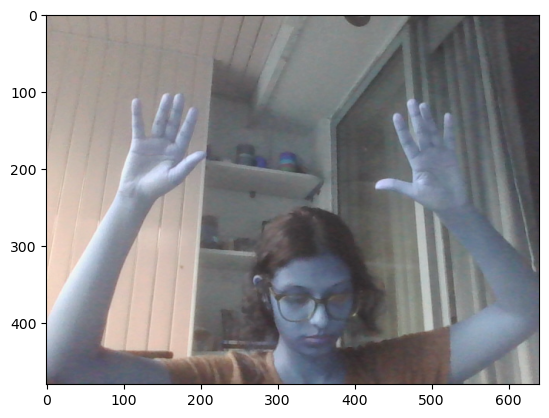

In [10]:
plt.imshow(frame)

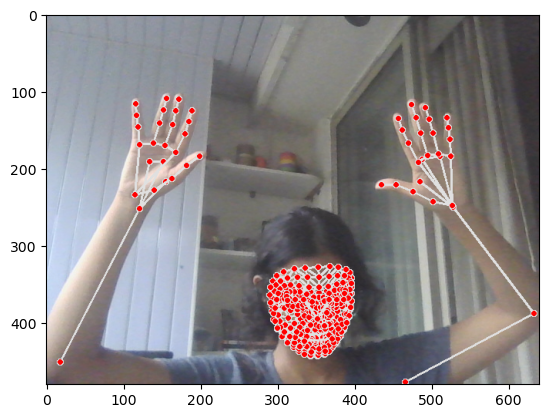

In [11]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

Extract Keypoint Values

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)


In [14]:
len(pose)


33

In [15]:
len(results.face_landmarks.landmark)*3

1404

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
print (face)

[ 0.55694973  0.86682707 -0.0105007  ...  0.60515922  0.754601
  0.00594035]


In [18]:
print (rh)
print (lh)
print (pose)

[ 1.79978117e-01  4.88122582e-01  1.77244871e-07  2.19048157e-01
  4.76326585e-01 -1.92806199e-02  2.55618244e-01  4.44858491e-01
 -2.66642068e-02  2.84428746e-01  4.08424169e-01 -3.27194855e-02
  3.12061250e-01  3.85316700e-01 -3.82270478e-02  2.62612164e-01
  3.73584419e-01 -8.54397286e-03  2.81313598e-01  3.23993891e-01
 -1.83210950e-02  2.89873630e-01  2.91147888e-01 -2.76518334e-02
  2.96726942e-01  2.62350470e-01 -3.51076759e-02  2.41949514e-01
  3.55348438e-01 -7.65230926e-03  2.56641686e-01  2.99145252e-01
 -1.60700958e-02  2.63947427e-01  2.61638999e-01 -2.55458783e-02
  2.70174295e-01  2.29241550e-01 -3.30011435e-02  2.17986777e-01
  3.49538147e-01 -9.78405587e-03  2.30157346e-01  2.95010805e-01
 -2.02918556e-02  2.37808272e-01  2.58677512e-01 -2.96933223e-02
  2.44979858e-01  2.28120312e-01 -3.64114046e-02  1.90150410e-01
  3.52878869e-01 -1.38661619e-02  1.85981721e-01  3.05869460e-01
 -2.60581598e-02  1.83466524e-01  2.73484796e-01 -3.33862454e-02
  1.82595998e-01  2.42835

EXTRACT KEYPOINTS 

In [20]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [21]:
extract_keypoints(results).shape

(1662,)

In [22]:
result_test = extract_keypoints(results)

In [23]:
result_test

array([ 0.55143857,  0.82339436, -0.92215985, ...,  0.182596  ,
        0.24283582, -0.03789074])

In [24]:
np.save('0', result_test)

SAVE

In [26]:
np.load('0.npy')
#saving array

array([ 0.55143857,  0.82339436, -0.92215985, ...,  0.182596  ,
        0.24283582, -0.03789074])

In [27]:
#Setup Folders for Collection

In [28]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','R','S','T','U','V','W','X','Y','Z','Hello','Help Please','Yes'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [29]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

Preprocess Data and Create Labels and Features

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'R': 16,
 'S': 17,
 'T': 18,
 'U': 19,
 'V': 20,
 'W': 21,
 'X': 22,
 'Y': 23,
 'Z': 24,
 'Hello': 25,
 'Help Please': 26,
 'Yes': 27}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [34]:
np.array(sequences).shape

(840, 30, 1662)

In [35]:
np.array(labels).shape

(840,)

In [36]:
X = np.array(sequences)

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

LSTM 

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [42]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu')) #activation fn
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [43]:
res = [0.7, 0.2, 0.1]

SAVE AND LOAD MODEL AND FIT IT

In [45]:
res = model.predict(X_test)

2/2 [==============================] - 1s 22ms/step


In [46]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [47]:
model.fit(X_train,y_train,epochs=20,callbacks=[tb_callback])

Epoch 1/20
25/25 [==============================] - 8s 111ms/step - loss: 3.2797 - categorical_accuracy: 0.1028
Epoch 2/20
25/25 [==============================] - 3s 111ms/step - loss: 3.1852 - categorical_accuracy: 0.0927
Epoch 3/20
25/25 [==============================] - 3s 110ms/step - loss: 4.4119 - categorical_accuracy: 0.1579
Epoch 4/20
25/25 [==============================] - 3s 109ms/step - loss: 211.4388 - categorical_accuracy: 0.0739
Epoch 5/20
25/25 [==============================] - 3s 110ms/step - loss: 13.1419 - categorical_accuracy: 0.0439
Epoch 6/20
25/25 [==============================] - 3s 109ms/step - loss: 6.9160 - categorical_accuracy: 0.0777
Epoch 7/20
25/25 [==============================] - 3s 111ms/step - loss: 4.9069 - categorical_accuracy: 0.1566
Epoch 8/20
25/25 [==============================] - 3s 114ms/step - loss: 7.1675 - categorical_accuracy: 0.1729
Epoch 9/20
25/25 [==============================] - 3s 115ms/step - loss: 68.5223 - categorical_accur

Model train

In [49]:
res = model.predict(X_test)

2/2 [==============================] - 1s 30ms/step


In [50]:
model.save('action.h5')

In [51]:
model.save('saved_model\my_model')

INFO:tensorflow:Assets written to: saved_model\my_model\assets


INFO:tensorflow:Assets written to: saved_model\my_model\assets


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 28)                924       
                                                                 
Total params: 597,500
Trainable params: 597,500
Non-trai

In [53]:
model.load_weights('action.h5')

In [61]:
loaded = tf.saved_model.load('saved_model/my_model')

TEST

In [54]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 43ms/step


array([[0.03757667, 0.03682563, 0.03650621, 0.03471902, 0.03789834,
        0.03634763, 0.03443362, 0.03312736, 0.03711467, 0.0326805 ,
        0.03510228, 0.03479145, 0.03440888, 0.03196985, 0.0370499 ,
        0.03875275, 0.03310614, 0.03806092, 0.036458  , 0.03413862,
        0.03750438, 0.03554057, 0.03241321, 0.03483308, 0.03610307,
        0.03706384, 0.03835339, 0.03712003]], dtype=float32)

Evaluation

In [56]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [57]:
yhat = model.predict(X_test)

2/2 [==============================] - 0s 18ms/step


In [58]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [59]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[41,  0],
        [ 1,  0]],

       [[40,  0],
        [ 2,  0]],

       [[40,  0],
        [ 2,  0]],

       [[40,  0],
        [ 2,  0]],

       [[40,  0],
        [ 2,  0]],

       [[41,  0],
        [ 1,  0]],

       [[40,  0],
        [ 2,  0]],

       [[40,  0],
        [ 2,  0]],

       [[40,  0],
        [ 2,  0]],

       [[38,  0],
        [ 4,  0]],

       [[40,  0],
        [ 2,  0]],

       [[ 1, 38],
        [ 0,  3]],

       [[40,  0],
        [ 2,  0]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 1,  0]],

       [[40,  0],
        [ 2,  0]],

       [[40,  0],
        [ 2,  0]],

       [[40,  0],
        [ 2,  0]],

       [[41,  0],
        [ 1,  0]],

       [[40,  0],
        [ 2,  0]],

       [[41,  0],
        [ 1,  0]],

       [[39,  0],
        [ 3,  0]]], dtype=int64)

In [60]:
accuracy_score(ytrue, yhat)

0.09523809523809523

TEST REAL TIME

In [68]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            import pyttsx3  
# initialize Text-to-speech engine 
            engine = pyttsx3.init()  
# convert this text to speech  
            text = actions[np.argmax(res)]
            engine.say(text)  
# play the speech  
            engine.runAndWait() 
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [69]:
cap.release()
cv2.destroyAllWindows()

In [63]:
import pyttsx3  
# initialize Text-to-speech engine 
engine = pyttsx3.init()  
# convert this text to speech  
text = action
engine.say(text)  
# play the speech  
engine.runAndWait()  
#raise volume u can hear 'help'

In [73]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [82]:
sequence.reverse()


In [83]:
sequence.reverse()

In [84]:
sequence[-30:]

[array([ 0.60453182,  0.74139392, -1.03524256, ...,  0.        ,
         0.        ,  0.        ])]

In [85]:
import pyttsx3  
# initialize Text-to-speech engine 
engine = pyttsx3.init()  
# convert this text to speech  
text = action
engine.say(text)  
# play the speech  
engine.runAndWait()  
#raise volume u can hear 'help'

In [75]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [76]:
res[np.argmax(res)] > threshold

False

In [88]:
print(actions[np.argmax(res)])

P


In [90]:
import cv2
import numpy as np
from tkinter import*
import tkinter as tk
from tkinter import ttk
from tkinter import font
from PIL import Image, ImageTk

import pyttsx3  
words=actions[np.argmax(res)]
root = tk.Tk()
root.title("PAB")
root.geometry("700x700")
root.configure(bg="black")
#icon
photo = tk.PhotoImage(file = r"C:\Users\priya\Downloads\ASL\icon.png")
root.iconphoto(False, photo)
def close():
   #win.destroy()
   root.destroy()

def read_text_aloud():
    # Initialize the pyttsx3 engine

    engine = pyttsx3.init()

    # Get the text from the entry widget
    text = words

    # Set the text to be spoken by the engine
    engine.say(text)

    # Run the engine
    engine.runAndWait()
# Background
#bg= tk.PhotoImage(file = "pab_logo.png")
# Show image using label
#label1 = tk.Label(root,image = bg)
#label1.place(x = 0, y = 0)
# Create an object of tkinter ImageTk
frame = Frame(root, width=200, height=200)
frame.pack()
frame.place(anchor='center', relx=0.5, rely=0.5)
img_image = ImageTk.PhotoImage(Image.open(r"C:\Users\priya\Downloads\ASL\pab_logo.png"))

# Create a Label Widget to display the text or Image
label = Label(frame, image = img_image)
label.pack()

#title
title = tk.Label(master =root, text="ASL recognition", font="Castellar 18 bold",bg="black" , fg="white")
title.pack(padx=10, pady=30)




#button
input_frame=tk.Frame(master=root,bg='black')

# label =tk.Entry(master=input_frame,bg='black')
# #entry.insert(0)
# label.pack(side='top',padx= 20)


button1 =tk.Button(master =input_frame, text="Exit", font="Castellar 10 bold",command=close)
button1.pack(side='bottom',pady=5,padx=10)
#input_frame2.pack()
input_frame.pack()
button2 =tk.Button(master =input_frame, text="Translate  Gesture", font="Castellar 10 bold",command=read_text_aloud)
button2.pack(side='top',pady=5,padx=10)
font.families()
root.update()



colors = [(245,117,16), (117,245,16), (16,117,245)]


root.mainloop()



In [91]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 202ms/step


array([[0.03757667, 0.03682563, 0.03650621, 0.03471902, 0.03789834,
        0.03634763, 0.03443362, 0.03312736, 0.03711467, 0.0326805 ,
        0.03510228, 0.03479145, 0.03440888, 0.03196985, 0.0370499 ,
        0.03875275, 0.03310614, 0.03806092, 0.036458  , 0.03413862,
        0.03750438, 0.03554057, 0.03241321, 0.03483308, 0.03610307,
        0.03706384, 0.03835339, 0.03712003]], dtype=float32)

In [92]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame